In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import sys 
sys.path.append(r'..\utils') 
from utils import get_seaad_colors, get_tx_order

Plot the M, E, and ME dprime results together in one plot

In [2]:
out_dir = r'\\allen\programs\celltypes\workgroups\mousecelltypes\SarahWB\datasets\human_exc\analysis\20251010_seaad\multimodal_dprime'
os.makedirs(out_dir, exist_ok=True)

In [3]:
#get seaad colors 
color_dict = get_seaad_colors()

#get tx order
ttype_order, subclass_order = get_tx_order()

In [4]:
modality_palette = {
    "E": "#DF4618",   # deep red
    "M": "#2154DF",  # teal-blue
    "ME": "#03B378",    # turquoise-green
}



By Layer

In [6]:
root = r'\\allen\programs\celltypes\workgroups\mousecelltypes\SarahWB\datasets\human_exc\analysis\20251010_seaad'
e_data_layer = pd.read_csv(os.path.join(root, 'E_dprime', 'dprime_layer_E.csv'))
m_data_layer = pd.read_csv(os.path.join(root, 'M_dprime', 'dprime_layer_M.csv'))
me_data_layer = pd.read_csv(os.path.join(root, 'ME_dprime', 'dprime_layer_ME.csv'))

e_data_layer['modality'] = 'E'
m_data_layer['modality'] = 'M'
me_data_layer['modality'] = 'ME'

filter_layer_pairs = False #only show pairs that have ME data
if filter_layer_pairs:
    pairs = set(zip(me_data_layer["cluster_1"], me_data_layer["cluster_2"]))
    e_data_layer = e_data_layer[e_data_layer.apply(lambda row: (row["cluster_1"], row["cluster_2"]) in pairs, axis=1)]
    m_data_layer = m_data_layer[m_data_layer.apply(lambda row: (row["cluster_1"], row["cluster_2"]) in pairs, axis=1)]

data_layer = pd.concat([e_data_layer, m_data_layer, me_data_layer])

if filter_layer_pairs:
    data_layer.to_csv(os.path.join(out_dir, f"multimodal_dprime_pairwise_avg_by_layer_filtered.csv"), index=False)  
else:
    data_layer.to_csv(os.path.join(out_dir, f"multimodal_dprime_pairwise_avg_by_layer.csv"), index=False)  


C:\Users\sarah.wallingbell\AppData\Local\Temp\ipykernel_1864\2518825082.py:5: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=data_layer, x="dprime", y="layer", hue="modality", dodge=0.5, join=False, errorbar=None, markers="|", scale=1.5, palette=modality_palette)
C:\Users\sarah.wallingbell\AppData\Local\Temp\ipykernel_1864\2518825082.py:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=data_layer, x="dprime", y="layer", hue="modality", dodge=0.5, join=False, errorbar=None, markers="|", scale=1.5, palette=modality_palette)


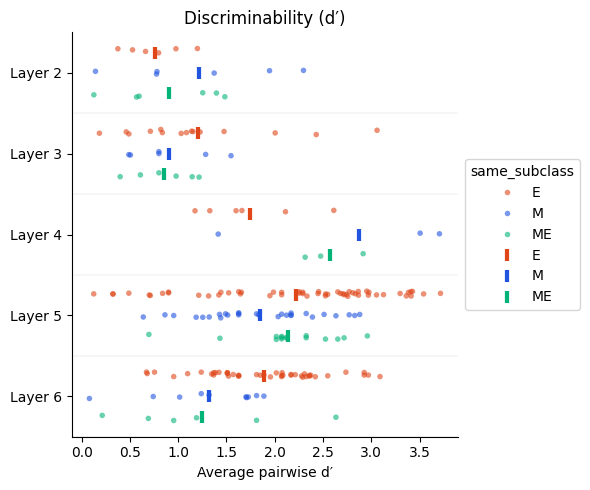

In [7]:
fig, ax = plt.subplots(figsize=(6,5))

#PLOT DATA
sns.stripplot(data=data_layer, x="dprime", y="layer", hue="modality", size=4, jitter=True, alpha=0.6, dodge=True, palette=modality_palette)
sns.pointplot(data=data_layer, x="dprime", y="layer", hue="modality", dodge=0.5, join=False, errorbar=None, markers="|", scale=1.5, palette=modality_palette)

# --- Add horizontal separators between hue groups ---
n_hues = data_layer["modality"].nunique()
for i, layer in enumerate(data_layer["layer"].unique()):
    # Each "layer" category is drawn at integer y=i
    # The stripplot with dodge places hues side-by-side
    ax.axhline(y=i + 0.5, color="gray", lw=0.25, alpha=0.4)

#FORMAT
sns.despine(top=True, right=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="same_subclass")  # outside right
plt.xlabel("Average pairwise d′")
plt.ylabel("")
plt.title(f"Discriminability (d′)")
plt.tight_layout()
if filter_layer_pairs:
    plt.savefig(os.path.join(out_dir, f"multimodal_dprime_pairwise_avg_by_layer_filtered.pdf"), dpi=600)   # saves current figure as PDF
else:
    plt.savefig(os.path.join(out_dir, f"multimodal_dprime_pairwise_avg_by_layer.pdf"), dpi=600)   # saves current figure as PDF



Marker shape shows if pair is from same subclass

C:\Users\sarah.wallingbell\AppData\Local\Temp\ipykernel_1864\2822767915.py:8: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=data_layer, x="dprime", y="layer", hue="modality", dodge=0.5, join=False, errorbar=None, markers="|", scale=1.5, palette=modality_palette)
C:\Users\sarah.wallingbell\AppData\Local\Temp\ipykernel_1864\2822767915.py:8: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=data_layer, x="dprime", y="layer", hue="modality", dodge=0.5, join=False, errorbar=None, markers="|", scale=1.5, palette=modality_palette)


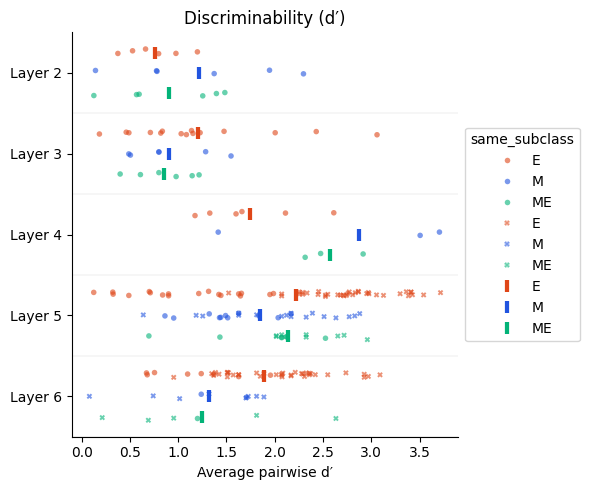

In [8]:
fig, ax = plt.subplots(figsize=(6,5))

# #PLOT DATA
markers = {True: 'o', False: 'X'}
for val, marker in markers.items():
    subset = data_layer[data_layer['same_subclass'] == val]
    sns.stripplot(data=subset, x="dprime", y="layer", hue="modality", marker=marker, size=4, jitter=True, alpha=0.6, dodge=True, palette=modality_palette)
sns.pointplot(data=data_layer, x="dprime", y="layer", hue="modality", dodge=0.5, join=False, errorbar=None, markers="|", scale=1.5, palette=modality_palette)

# --- Add horizontal separators between hue groups ---
n_hues = data_layer["modality"].nunique()
for i, layer in enumerate(data_layer["layer"].unique()):
    # Each "layer" category is drawn at integer y=i
    # The stripplot with dodge places hues side-by-side
    ax.axhline(y=i + 0.5, color="gray", lw=0.25, alpha=0.4)

#FORMAT
sns.despine(top=True, right=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="same_subclass")  # outside right
plt.xlabel("Average pairwise d′")
plt.ylabel("")
plt.title(f"Discriminability (d′)")
plt.tight_layout()
if filter_layer_pairs:
    plt.savefig(os.path.join(out_dir, f"multimodal_dprime_pairwise_avg_by_layer_mark_same_subclass_filtered.pdf"), dpi=600)   # saves current figure as PDF
else:
    plt.savefig(os.path.join(out_dir, f"multimodal_dprime_pairwise_avg_by_layer_mark_same_subclass.pdf"), dpi=600)   # saves current figure as PDF



In [9]:
data_layer[(data_layer.layer == 'Layer 6') & (data_layer.same_subclass == True)].sort_values(by=['modality', 'dprime'])

,layer,dprime,cluster_1,cluster_2,subclass_1,subclass_2,same_subclass,modality
82,Layer 6,0.672092,L6 CT_1,L6 CT_2,L6 CT,L6 CT,True,E
83,Layer 6,0.679734,L6 CT_1,L6 CT_3,L6 CT,L6 CT,True,E
84,Layer 6,0.755057,L6 IT_1,L6 IT_2,L6 IT,L6 IT,True,E
86,Layer 6,1.098026,L6 IT Car3_1,L6 IT Car3_3,L6 IT Car3,L6 IT Car3,True,E
87,Layer 6,1.239053,L6b_3,L6b_6,L6b,L6b,True,E
89,Layer 6,1.368141,L6 IT Car3_2,L6 IT Car3_3,L6 IT Car3,L6 IT Car3,True,E
98,Layer 6,1.626840,L6 CT_2,L6 CT_3,L6 CT,L6 CT,True,E
104,Layer 6,1.955849,L6 IT Car3_1,L6 IT Car3_2,L6 IT Car3,L6 IT Car3,True,E
46,Layer 6,1.239053,L6 IT_1,L6 IT_2,L6 IT,L6 IT,True,M
49,Layer 6,1.707541,L6 IT Car3_1,L6 IT Car3_3,L6 IT Car3,L6 IT Car3,True,M


By Subclass

In [10]:
root = r'\\allen\programs\celltypes\workgroups\mousecelltypes\SarahWB\datasets\human_exc\analysis\20251010_seaad'
e_data_subclass = pd.read_csv(os.path.join(root, 'E_dprime', 'dprime_subclass_E.csv'))
m_data_subclass = pd.read_csv(os.path.join(root, 'M_dprime', 'dprime_subclass_M.csv'))
me_data_subclass = pd.read_csv(os.path.join(root, 'ME_dprime', 'dprime_subclass_ME.csv'))

e_data_subclass['modality'] = 'E'
m_data_subclass['modality'] = 'M'
me_data_subclass['modality'] = 'ME'

if filter_layer_pairs:
    pairs = set(zip(me_data_subclass["cluster_1"], me_data_subclass["cluster_2"]))
    e_data_subclass = e_data_subclass[e_data_subclass.apply(lambda row: (row["cluster_1"], row["cluster_2"]) in pairs, axis=1)]
    m_data_subclass = m_data_subclass[m_data_subclass.apply(lambda row: (row["cluster_1"], row["cluster_2"]) in pairs, axis=1)]

data_subclass = pd.concat([e_data_subclass, m_data_subclass, me_data_subclass])

if filter_layer_pairs:
    data_layer.to_csv(os.path.join(out_dir, f"multimodal_dprime_pairwise_avg_by_subclass_filtered.csv"), index=False)  
else:
    data_layer.to_csv(os.path.join(out_dir, f"multimodal_dprime_pairwise_avg_by_subclass.csv"), index=False)  

C:\Users\sarah.wallingbell\AppData\Local\Temp\ipykernel_1864\2887510038.py:5: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(data=data_subclass, x='dprime', y='subclass_label', hue="modality", dodge=0.5, join=False, errorbar=None, markers="|", scale=1.5, palette=modality_palette)
C:\Users\sarah.wallingbell\AppData\Local\Temp\ipykernel_1864\2887510038.py:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=data_subclass, x='dprime', y='subclass_label', hue="modality", dodge=0.5, join=False, errorbar=None, markers="|", scale=1.5, palette=modality_palette)


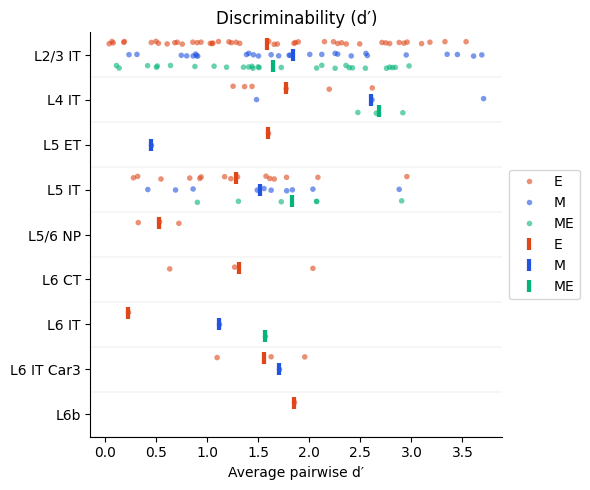

In [12]:
fig, ax = plt.subplots(figsize=(6,5))

#PLOT DATA
sns.stripplot(data=data_subclass, x="dprime", y="subclass_label", hue="modality", size=4, jitter=True, alpha=0.6, dodge=True, palette=modality_palette)
sns.pointplot(data=data_subclass, x='dprime', y='subclass_label', hue="modality", dodge=0.5, join=False, errorbar=None, markers="|", scale=1.5, palette=modality_palette)

# --- Add horizontal separators between hue groups ---
n_hues = data_subclass["modality"].nunique()
for i, layer in enumerate(data_subclass["subclass_label"].unique()):
    # Each "layer" category is drawn at integer y=i
    # The stripplot with dodge places hues side-by-side
    ax.axhline(y=i + 0.5, color="gray", lw=0.25, alpha=0.4)

#FORMAT
sns.despine(top=True, right=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # outside right
plt.xlabel("Average pairwise d′")
plt.ylabel("")
plt.title("Discriminability (d′)")
plt.tight_layout()
if filter_layer_pairs:
    plt.savefig(os.path.join(out_dir, f"multimodal_dprime_pairwise_avg_by_subclass_filtered.pdf"), dpi=600)   # saves current figure as PDF
else:
    plt.savefig(os.path.join(out_dir, f"multimodal_dprime_pairwise_avg_by_subclass.pdf"), dpi=600)   # saves current figure as PDF



In [13]:
data_subclass

,subclass_label,dprime,cluster_1,cluster_2,modality
0,L2/3 IT,0.041809,L2 IT_1,L3 IT_8,E
1,L2/3 IT,0.069084,L2 IT_6,L2 IT_7,E
2,L2/3 IT,0.080610,L2 IT_6,L3 IT_8,E
3,L2/3 IT,0.184250,L3 IT_3,L3 IT_5,E
4,L2/3 IT,0.190480,L2 IT_7,L3 IT_8,E
...,...,...,...,...,...
33,L5 IT,1.726246,L5 IT_2,L5 IT_6,ME
34,L5 IT,2.072154,L5 IT_2,L5 IT_7,ME
35,L5 IT,2.072154,L5 IT_6,L5 IT_7,ME
36,L5 IT,2.904440,L5 IT_5,L5 IT_7,ME
